<a href="https://colab.research.google.com/github/hu921/AI-ML-Projects/blob/master/Stock_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [59]:
#Import the libraries
#import pandas_datareader as web
import math
import numpy as np
import pandas_datareader as pdr
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as p1t
p1t.style.use('fivethirtyeight')

In [67]:
#Get the stock quote
df = yf.download('AAPL', start='2016-01-01', end='2023-12-13')
#Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.977478,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.376617,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.919140,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.951855,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.067926,283192000
...,...,...,...,...,...,...
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700
2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300


In [13]:
#Get the number of rows and columns in the data set
df.shape

(2002, 6)

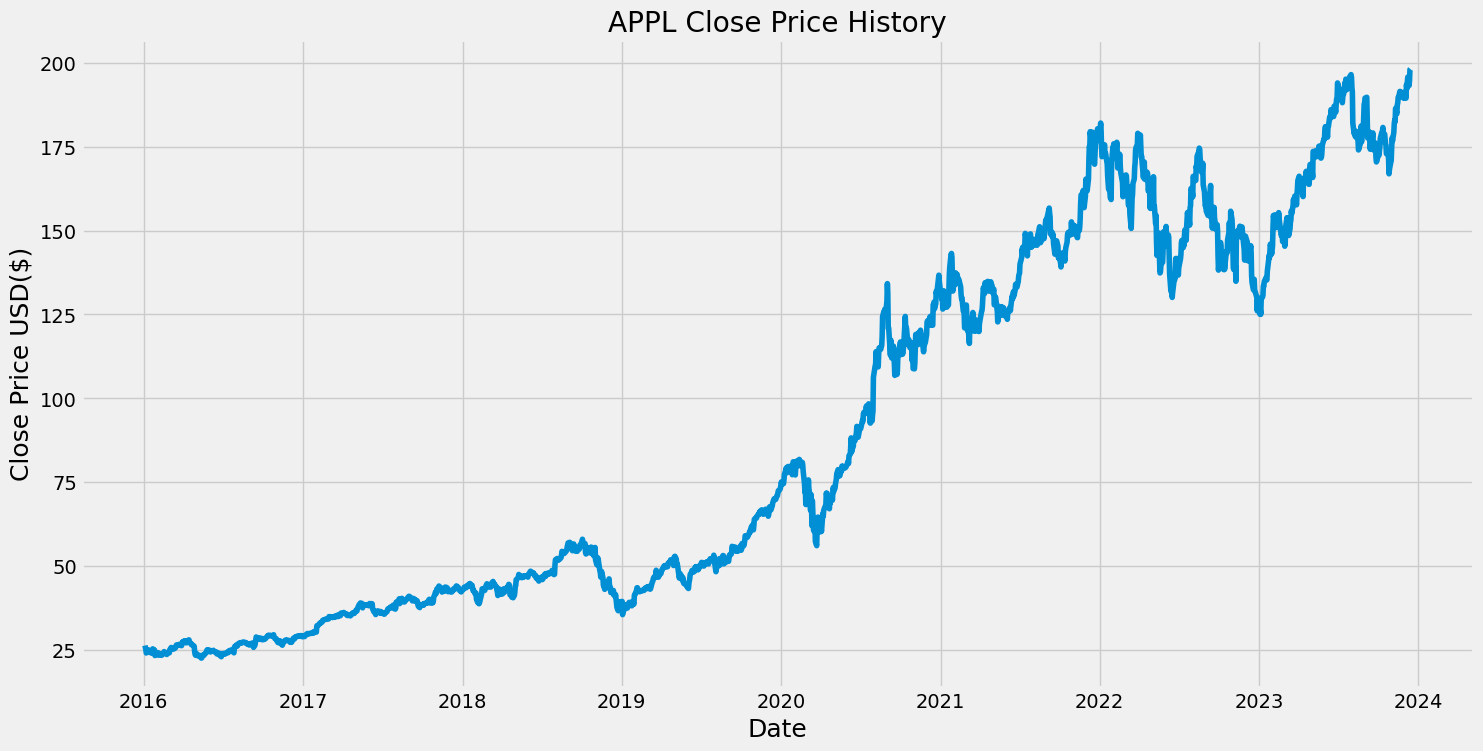

In [14]:
#Visualize the closing prices history
p1t.figure(figsize=(16,8))
p1t.plot(df['Close'])
p1t.title('APPL Close Price History')
p1t.xlabel('Date', fontsize=18), p1t.ylabel('Close Price USD($)', fontsize=18)
p1t.show()




In [18]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1602

In [19]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02137872],
       [0.01761858],
       [0.01475573],
       ...,
       [0.98062957],
       [0.99914546],
       [1.        ]])

In [21]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.02137872, 0.01761858, 0.01475573, 0.00870246, 0.00942886,
       0.01166501, 0.01370176, 0.01004131, 0.01307506, 0.00967099,
       0.00900158, 0.00918673, 0.00848883, 0.01578123, 0.01296113,
       0.01374448, 0.00438684, 0.00534112, 0.00997009, 0.00867398,
       0.00589661, 0.00856004, 0.00891611, 0.00524142, 0.00665148,
       0.00662299, 0.00559749, 0.00478564, 0.00519869, 0.00897309,
       0.01108105, 0.00843186, 0.00811851, 0.00931491, 0.00619571,
       0.00820396, 0.009144  , 0.00935765, 0.0090443 , 0.01451361,
       0.01482695, 0.01589518, 0.01804587, 0.01642217, 0.01522575,
       0.01535395, 0.01542516, 0.01697765, 0.01734796, 0.02028202,
       0.02226179, 0.02201966, 0.02219057, 0.02217634, 0.02333002,
       0.02248967, 0.0218345 , 0.02115084, 0.02469734, 0.02737502])]
[0.026563169582324714]

[array([0.02137872, 0.01761858, 0.01475573, 0.00870246, 0.00942886,
       0.01166501, 0.01370176, 0.01004131, 0.01307506, 0.00967099,
       0.00900158, 0.00918673, 0.0

In [22]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [28]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 53s 32ms/step - loss: 0.0014


In [38]:
#Create the testing data set
#Create a new array containing scaled values from index 1542 to 1602
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #contains extra value
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [33]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [34]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
#Get the models predicted price values
predictions = model.predict(x_test) #we want to get the same predictions for mthe y_test dataset
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 16ms/step


In [40]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test) **2)))
rmse

6.58781388034816

<ipython-input-44-25778890dcb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'predictions'] = predictions


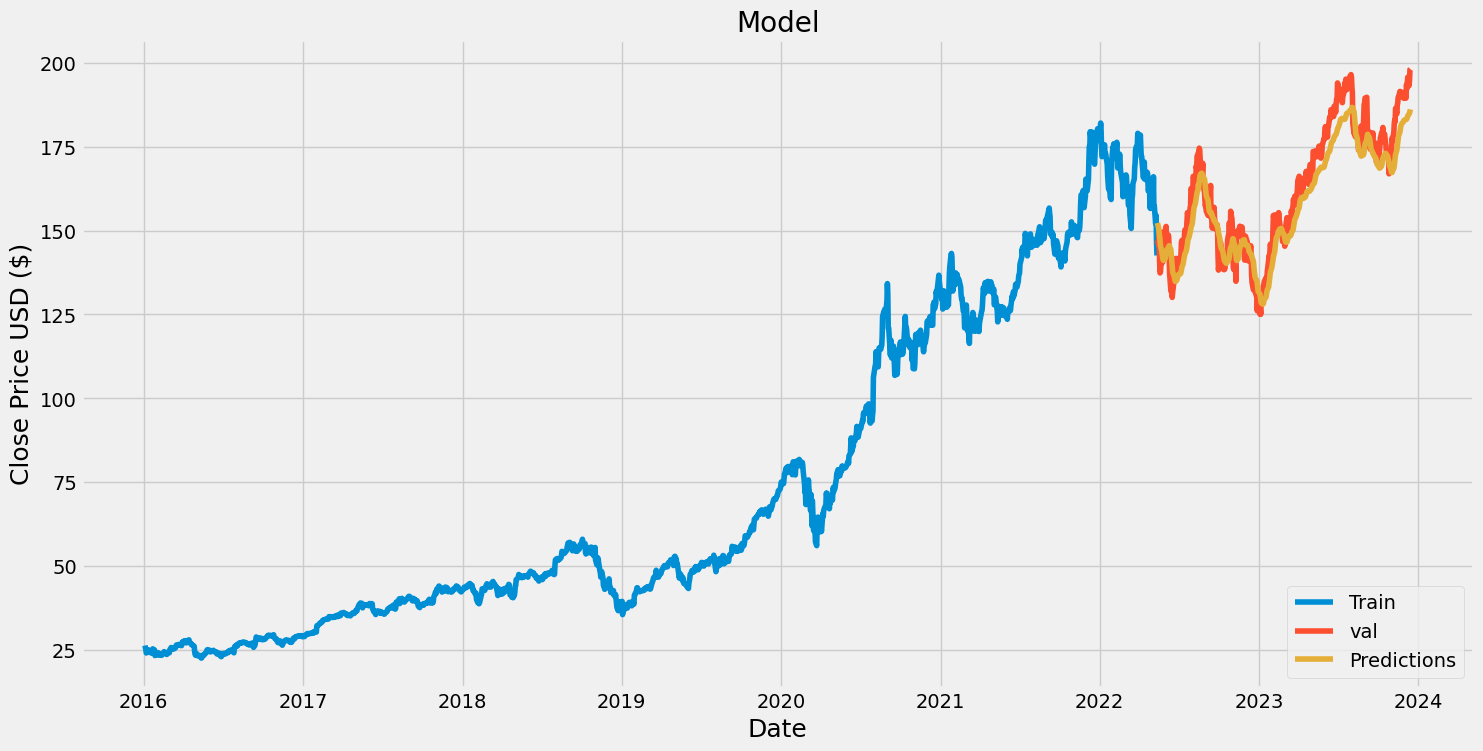

In [44]:
#Plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
#valid['predictions'] = predictions
valid.loc[:, 'predictions'] = predictions
#Visualize the data
p1t.figure(figsize=(16,8))
p1t.title('Model')
p1t.xlabel('Date', fontsize=18)
p1t.ylabel('Close Price USD ($)', fontsize=18)
p1t.plot(train['Close'])
#p1t.plot(valid['Close', 'Predictions'])
p1t.plot(valid['Close'])
p1t.plot(valid['predictions'])
p1t.legend(['Train', 'val', 'Predictions'], loc='lower right')
p1t.show()

In [45]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2022-05-13,147.110001,152.252136
2022-05-16,145.539993,150.689438
2022-05-17,149.240005,149.274002
2022-05-18,140.820007,148.399109
2022-05-19,137.350006,147.115631
...,...,...
2023-12-08,195.710007,184.154007
2023-12-11,193.179993,184.730301
2023-12-12,194.710007,185.096817


In [62]:
#Predict the closing price for 12-15
#Get the quote
apple_quote = yf.download('AAPL', start='2016-01-01', end='2023-12-13')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty lsit
X_test = []
#Append the past 60 days to X_test
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 29ms/step
[[185.47415]]


In [65]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2023-12-14', end='2023-12-15')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-12-14    198.110001
Name: Close, dtype: float64
